In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Add channel dimension
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [5]:
# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
# Clip the pixel values to stay between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [7]:
# Build the autoencoder
input_img = layers.Input(shape=(28, 28, 1))

In [8]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

In [9]:
# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [10]:
# Compile the model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [11]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.3130 - val_loss: 0.1314
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1278 - val_loss: 0.1183
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.1182 - val_loss: 0.1139
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1136 - val_loss: 0.1102
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1109 - val_loss: 0.1087
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1088 - val_loss: 0.1069
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.1069 - val_loss: 0.1049
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1059 - val_loss: 0.1039
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.1046 - val_loss: 0.1034
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.1038 - val_loss: 0.1023


In [12]:
# Denoise test images
denoised_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


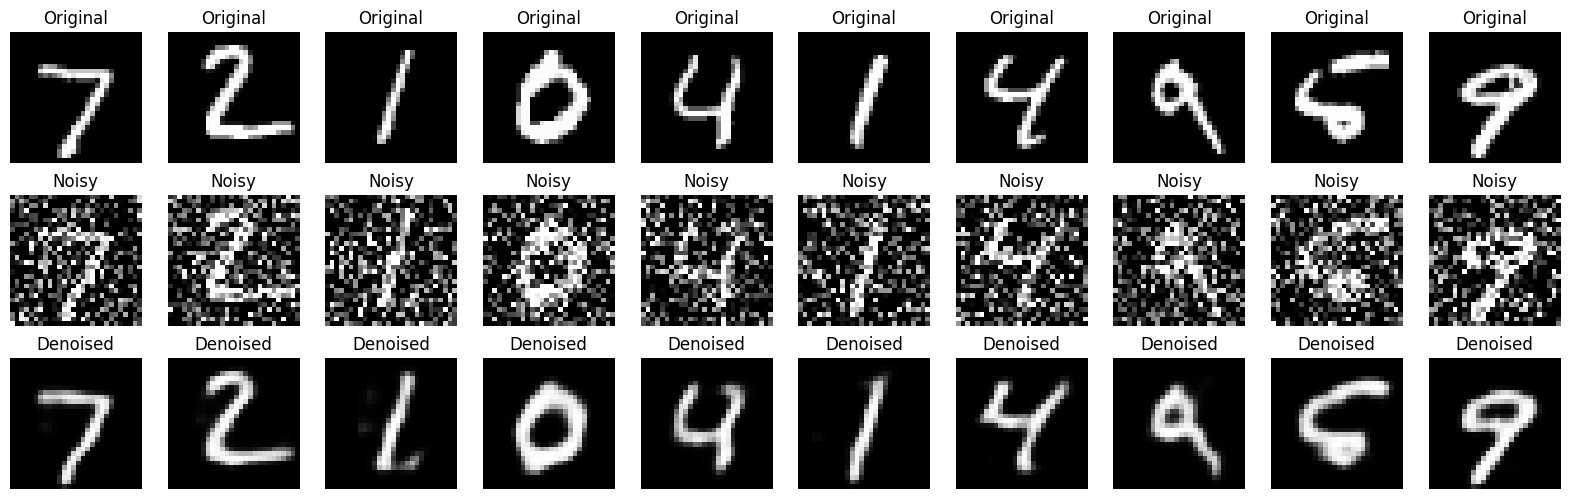

In [19]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()